<a href="https://colab.research.google.com/github/TharinduGee/Prediction_Models/blob/test0---consider-correlation-of-dataset-only-numeric/Corbon_emission_predictor_Only_using_numeric_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import tensorflow as tf;

In [2]:
record = pd.read_excel('https://www.epa.gov/system/files/documents/2022-04/22-tstcar-2022-04-15.xlsx');


In [3]:
record = record.dropna(thresh = 3000, axis='columns')
record = record.fillna(method= 'ffill',axis='rows')


In [7]:

train_record = record.sample(frac = 0.8, random_state = 3)
test_record = record.drop(train_record.index)

In [8]:
numeric_feature_names = []
for name in record.columns:
  if record[name].dtype != object:
    numeric_feature_names.append(name)

numeric_feature_names

['Model Year',
 'Test Veh Configuration #',
 'Test Veh Displacement (L)',
 'Rated Horsepower',
 '# of Cylinders and Rotors',
 '# of Gears',
 'Transmission Overdrive Code',
 'Equivalent Test Weight (lbs.)',
 'Axle Ratio',
 'N/V Ratio',
 'Shift Indicator Light Use Cd',
 'Test Procedure Cd',
 'Test Fuel Type Cd',
 'THC (g/mi)',
 'CO (g/mi)',
 'CO2 (g/mi)',
 'NOx (g/mi)',
 'CH4 (g/mi)',
 'RND_ADJ_FE',
 'DT-Inertia Work Ratio Rating',
 'DT-Absolute Speed Change Ratg',
 'DT-Energy Economy Rating',
 'Target Coef A (lbf)',
 'Target Coef B (lbf/mph)',
 'Target Coef C (lbf/mph**2)',
 'Set Coef A (lbf)',
 'Set Coef B (lbf/mph)',
 'Set Coef C (lbf/mph**2)']

In [9]:
train_numeric_features = train_record[numeric_feature_names]
test_numeric_features = test_record[numeric_feature_names]


In [10]:
train_numeric_features.corr()

,Model Year,Test Veh Configuration #,Test Veh Displacement (L),Rated Horsepower,# of Cylinders and Rotors,# of Gears,Transmission Overdrive Code,Equivalent Test Weight (lbs.),Axle Ratio,N/V Ratio,...,RND_ADJ_FE,DT-Inertia Work Ratio Rating,DT-Absolute Speed Change Ratg,DT-Energy Economy Rating,Target Coef A (lbf),Target Coef B (lbf/mph),Target Coef C (lbf/mph**2),Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2)
Model Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Test Veh Configuration #,NaN,1.000000,0.053009,-0.053670,-0.034209,-0.071593,0.046304,-0.087953,0.071141,-0.021577,...,-0.023824,-0.036338,-0.036086,-0.021047,0.054090,-0.066659,-0.070987,0.031270,-0.041175,-0.060091
Test Veh Displacement (L),NaN,0.053009,1.000000,0.168753,0.172856,-0.020440,-0.201199,0.155579,0.217986,0.502733,...,0.002281,-0.020071,-0.018521,0.003044,0.048098,0.099776,0.032369,-0.043190,0.019064,0.047566
Rated Horsepower,NaN,-0.053670,0.168753,1.000000,0.728027,0.264268,-0.187900,0.429588,-0.013761,0.169194,...,0.093977,0.065569,0.072467,0.092112,0.538427,0.222262,0.028357,-0.075265,-0.011741,0.070114
# of Cylinders and Rotors,NaN,-0.034209,0.172856,0.728027,1.000000,0.347581,-0.006903,0.549996,-0.140355,0.022354,...,0.027399,0.064675,0.070956,0.104991,0.418279,0.255320,0.224269,-0.091432,-0.096966,0.275477
# of Gears,NaN,-0.071593,-0.020440,0.264268,0.347581,1.000000,0.370130,0.358910,-0.397161,-0.283008,...,-0.001256,-0.024955,-0.023885,0.000826,0.271651,0.141043,0.388898,0.049418,-0.032287,0.396521
Transmission Overdrive Code,NaN,0.046304,-0.201199,-0.187900,-0.006903,0.370130,1.000000,-0.122103,-0.305343,-0.465634,...,-0.006234,-0.111754,-0.113707,-0.098065,0.009384,-0.044272,0.166487,0.153263,-0.015342,0.157843
Equivalent Test Weight (lbs.),NaN,-0.087953,0.155579,0.429588,0.549996,0.358910,-0.122103,1.000000,-0.035950,0.112340,...,-0.068733,0.038302,0.046272,0.034639,0.386576,0.271047,0.539049,-0.146196,0.052219,0.517619
Axle Ratio,NaN,0.071141,0.217986,-0.013761,-0.140355,-0.397161,-0.305343,-0.035950,1.000000,0.404934,...,0.003252,0.061589,0.063010,0.056395,-0.078682,-0.074263,-0.042057,-0.078262,-0.006901,-0.042446
N/V Ratio,NaN,-0.021577,0.502733,0.169194,0.022354,-0.283008,-0.465634,0.112340,0.404934,1.000000,...,0.003654,0.038634,0.037584,0.021062,-0.024060,0.055271,-0.140775,-0.105358,0.039221,-0.115569


In [ ]:

train_target = train_numeric_features.pop("CO2 (g/mi)")
test_target = test_numeric_features.pop("CO2 (g/mi)")
train_numeric_features.head()

,Model Year,Test Veh Configuration #,Test Veh Displacement (L),Rated Horsepower,# of Cylinders and Rotors,# of Gears,Transmission Overdrive Code,Equivalent Test Weight (lbs.),Axle Ratio,N/V Ratio,...,RND_ADJ_FE,DT-Inertia Work Ratio Rating,DT-Absolute Speed Change Ratg,DT-Energy Economy Rating,Target Coef A (lbf),Target Coef B (lbf/mph),Target Coef C (lbf/mph**2),Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2)
1806,2022,0,5.300,355,8.0,6,2,5500,3.42,24.6,...,12.5,1.008000,0.744000,0.7780,52.820,0.84090,0.032210,-9.810,-0.04400,0.035940
3525,2022,1,3.445,416,6.0,10,2,5000,2.76,20.1,...,23.1,0.420000,0.210000,-0.1700,39.631,0.15691,0.019578,18.271,-0.08591,0.020445
1240,2022,0,3.600,470,6.0,6,2,4250,3.73,31.8,...,16.3,0.541645,-0.375934,-1.0466,43.410,0.35550,0.020860,18.260,-0.25130,0.025700
3129,2022,3,5.600,400,8.0,9,2,6000,3.69,23.1,...,18.9,3.090000,2.030000,1.4700,37.190,0.04190,0.040570,16.810,-0.29760,0.040980
3729,2022,0,1.987,169,4.0,6,2,3375,3.94,37.9,...,37.3,1.310000,0.910000,0.2700,25.138,0.13072,0.019293,13.540,-0.08360,0.019998


In [ ]:
tf.convert_to_tensor(train_numeric_features)

<tf.Tensor: shape=(3518, 27), dtype=float64, numpy=
array([[ 2.0220e+03,  0.0000e+00,  5.3000e+00, ..., -9.8100e+00,
        -4.4000e-02,  3.5940e-02],
       [ 2.0220e+03,  1.0000e+00,  3.4450e+00, ...,  1.8271e+01,
        -8.5910e-02,  2.0445e-02],
       [ 2.0220e+03,  0.0000e+00,  3.6000e+00, ...,  1.8260e+01,
        -2.5130e-01,  2.5700e-02],
       ...,
       [ 2.0220e+03,  0.0000e+00,  1.9840e+00, ...,  6.8800e+00,
        -1.5200e-01,  2.2130e-02],
       [ 2.0220e+03,  1.0000e+00,  2.0000e+00, ...,  4.9000e+00,
         1.5800e-01,  1.8920e-02],
       [ 2.0220e+03,  2.0000e+00,  3.4560e+00, ...,  1.1330e+01,
         2.6284e-01,  1.5807e-02]])>

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(train_numeric_features)

In [ ]:
normalizer(train_numeric_features.iloc[:3])

<tf.Tensor: shape=(3, 27), dtype=float32, numpy=
array([[ 0.2510773 , -0.6461372 ,  0.27780348,  0.22277802,  1.4018264 ,
        -0.22974658,  0.25003886,  1.121919  , -0.22757186, -0.1907779 ,
        -0.17446536,  0.04349321, -1.890736  ,  0.20158921, -0.27648124,
        -0.12516756,  2.8404562 , -0.10240007, -0.01768634, -0.03526393,
         0.00996929,  1.0968583 ,  1.8339957 ,  0.9195486 , -1.5511179 ,
        -0.46593025,  1.3915895 ],
       [ 0.2510773 ,  0.1982576 ,  0.00842676,  0.60059416,  0.28846708,
         1.0893039 ,  0.25003886,  0.5324757 , -0.754863  , -0.29725432,
        -0.17446536, -0.2571725 ,  0.3194214 , -0.40256923, -0.40757272,
        -0.71313316, -0.52303773, -0.08447495, -0.08340643, -0.0966454 ,
        -0.08768455,  0.01298299, -0.3218962 , -0.6272349 ,  0.78228235,
        -0.6043211 , -0.4441021 ],
       [ 0.2510773 , -0.6461372 ,  0.03093532,  0.93505436,  0.28846708,
        -0.22974658,  0.25003886, -0.35168928,  0.02009513, -0.02041564,
     

In [ ]:
def get_basic_model():
  model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(56, activation='relu'),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  # model.compile(optimizer='adam',
  #               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
  #               metrics=['accuracy'])
  
  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
model = get_basic_model()
history = model.fit(train_numeric_features, train_target,validation_split = 0.2, verbose=4,  epochs=70, batch_size=5)

Epoch 1/70
Epoch 2/70
Epoch 3/70
Epoch 4/70
Epoch 5/70
Epoch 6/70
Epoch 7/70
Epoch 8/70
Epoch 9/70
Epoch 10/70
Epoch 11/70
Epoch 12/70
Epoch 13/70
Epoch 14/70
Epoch 15/70
Epoch 16/70
Epoch 17/70
Epoch 18/70
Epoch 19/70
Epoch 20/70
Epoch 21/70
Epoch 22/70
Epoch 23/70
Epoch 24/70
Epoch 25/70
Epoch 26/70
Epoch 27/70
Epoch 28/70
Epoch 29/70
Epoch 30/70
Epoch 31/70
Epoch 32/70
Epoch 33/70
Epoch 34/70
Epoch 35/70
Epoch 36/70
Epoch 37/70
Epoch 38/70
Epoch 39/70
Epoch 40/70
Epoch 41/70
Epoch 42/70
Epoch 43/70
Epoch 44/70
Epoch 45/70
Epoch 46/70
Epoch 47/70
Epoch 48/70
Epoch 49/70
Epoch 50/70
Epoch 51/70
Epoch 52/70
Epoch 53/70
Epoch 54/70
Epoch 55/70
Epoch 56/70
Epoch 57/70
Epoch 58/70
Epoch 59/70
Epoch 60/70
Epoch 61/70
Epoch 62/70
Epoch 63/70
Epoch 64/70
Epoch 65/70
Epoch 66/70
Epoch 67/70
Epoch 68/70
Epoch 69/70
Epoch 70/70


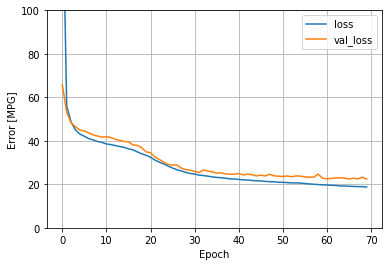

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [ ]:
test_results = {}
test_results['dnn_model'] = model.evaluate(test_numeric_features, test_target, verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [CO2 (g/mi)]']).T

,Mean absolute error [CO2 (g/mi)]
dnn_model,21.703938


In [ ]:
test_predictions = model.predict(test_numeric_features).flatten()
np.array(test_predictions)

array([ 186.4386  ,  194.1721  ,  315.93997 ,  262.83334 ,  272.30823 ,
        185.94748 ,  296.07462 ,  280.3239  ,  297.5214  ,  285.46558 ,
        184.56702 ,  302.1998  ,  357.81665 ,  290.36038 ,  200.30424 ,
        301.02588 ,  239.38072 ,  417.5265  ,  402.80365 ,  223.87155 ,
        321.88702 ,  321.5819  ,  321.82358 ,  312.30722 ,  300.88528 ,
        316.6122  ,  308.26602 ,  189.96965 ,  207.5178  ,  322.131   ,
        403.44156 ,  434.6191  ,  382.8143  ,  250.11919 ,  326.46774 ,
        191.28293 ,  325.15958 ,  334.65112 ,  326.6241  ,  405.71637 ,
        214.85493 ,  281.4891  ,  197.34361 ,  200.22191 ,  407.78186 ,
        366.98468 ,  286.8659  ,  237.9544  ,  356.28723 ,  350.4789  ,
        451.8018  ,  299.90353 ,  344.9649  ,  240.53123 ,  282.5962  ,
        449.57037 ,  463.18027 ,  447.80255 ,  281.50174 ,  450.2579  ,
        172.01836 ,  181.09387 ,  245.62253 ,  253.52216 ,  247.56609 ,
        256.20258 ,  185.43634 ,  178.89587 ,  269.42633 ,  237.

In [ ]:
pd.DataFrame([np.array(test_target),test_predictions,np.array(test_target - test_predictions)],index=['actual','predicted','error']).T

,actual,predicted,error
0,182.937761,186.438599,-3.500837
1,194.365806,194.172104,0.193703
2,316.657368,315.939972,0.717396
3,259.672000,262.833344,-3.161344
4,276.641000,272.308228,4.332772
...,...,...,...
874,230.000000,341.838959,-111.838959
875,223.000000,318.817627,-95.817627
876,342.000000,321.030396,20.969604
877,207.000000,210.618729,-3.618729


In [ ]:
model.save("CarbonPredictorModel.h5")

In [ ]:
!pip install tensorflowjs
!tensorflowjs_converter --input_format keras '/content/CarbonPredictorModel.h5' '/content/CarbonPredictorModel'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
weight count with shape () and dtype int64 was auto converted to the type int32
